<a href="https://colab.research.google.com/github/pedro-de-bastos/Modern-Computational-Statistics-CS146/blob/master/Sampling_with_Metropolis_Monte_Carlo_CS146_13_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import scipy.stats as sts
import matplotlib.pyplot as plt
import numpy as np

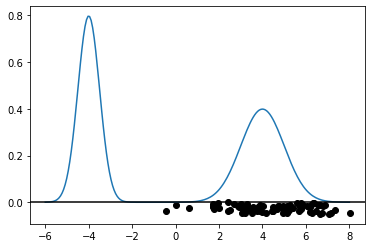

In [51]:


def target_pdf(x):
  return sts.norm.pdf(x, -4, 0.5)+sts.norm.pdf(x, 4, 1)

def proposal_pdf(x, x0, ep):
  return sts.norm.pdf(x, x0, ep)

def proposal_rvs(x0, ep):
  return sts.norm.rvs(x0, ep)


In [39]:
def produce_chain(ep, size = 100):
  x_chain = [0]
  for i in range(size):
    x_proposed = proposal_rvs(x_chain[-1], ep)
    x_previous = x_chain[-1]

    x_proposed_likelihood = proposal_pdf(x_previous, x_proposed, ep)
    x_proposed_prior = target_pdf(x_proposed)

    x_previous_likelihood = proposal_pdf(x_proposed, x_previous, ep)
    x_previous_prior = target_pdf(x_previous)

    a = (x_proposed_prior*x_proposed_likelihood)/(x_previous_prior*x_previous_likelihood)

    random_check = np.random.choice([0, 1])

    if a > random_check:
      x_chain.append(x_proposed)
  return np.asarray(x_chain)

In [40]:
samples = produce_chain(1)
samples

array([ 0.        , -0.43524015,  0.59553894,  1.72272982,  1.99491705,
        1.73563895,  1.78013434,  1.70519396,  2.67175709,  2.39471121,
        4.49538834,  4.45918498,  7.33760788,  6.15937688,  5.68974426,
        5.38457034,  4.95986803,  5.20359617,  8.01453026,  7.06525811,
        6.78704276,  6.3927382 ,  5.1321007 ,  4.93210358,  7.13354154,
        6.31669369,  6.18678196,  5.56812026,  4.16730545,  4.00272959,
        3.02476318,  2.39666905,  3.06757032,  3.08369909,  3.83240631,
        4.65656809,  3.77058898,  3.95658028,  5.78736223,  4.94782309,
        4.77261983,  5.86225165,  6.65939356,  6.24785867,  6.56947304,
        6.27026512,  6.8717477 ,  5.70689054,  6.46462978,  6.17194142,
        5.79381571,  5.16396263,  3.53084815,  3.10406141,  1.94028378,
        2.89969627,  5.08594266,  6.76276802,  5.28867709,  4.71657259,
        3.79617516,  3.3318404 ,  3.86583277,  3.86387408,  3.30591129,
        3.55238984,  2.49609837,  3.17378762,  4.47760607,  5.73

[]

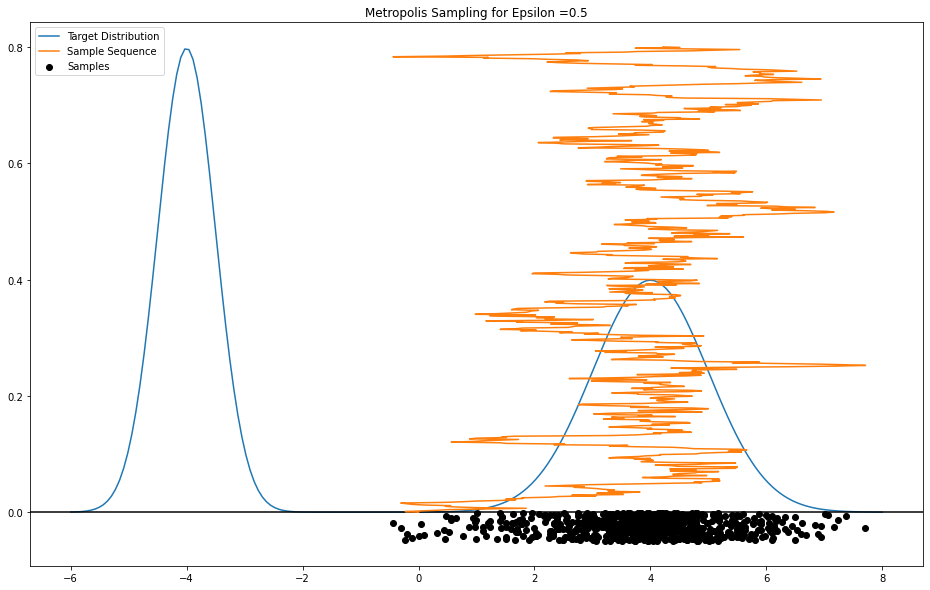

In [64]:
x = np.linspace(-6, 8, num=200)
p_x = target_pdf(x)
ep = 0.5

samples = produce_chain(0.5, size=1000)
y = np.linspace(0, 0.8, num=len(samples))

plt.figure(figsize=(16, 10))
plt.plot(x, p_x, label="Target Distribution")
plt.scatter(samples, sts.uniform.rvs(-0.05, 0.05, size=len(samples)), color='black', label="Samples")
plt.axhline(0, color="black")
plt.plot(samples, y, label="Sample Sequence")
plt.title("Metropolis Sampling for Epsilon ="+str(ep))
plt.legend()
plt.plot()

[]

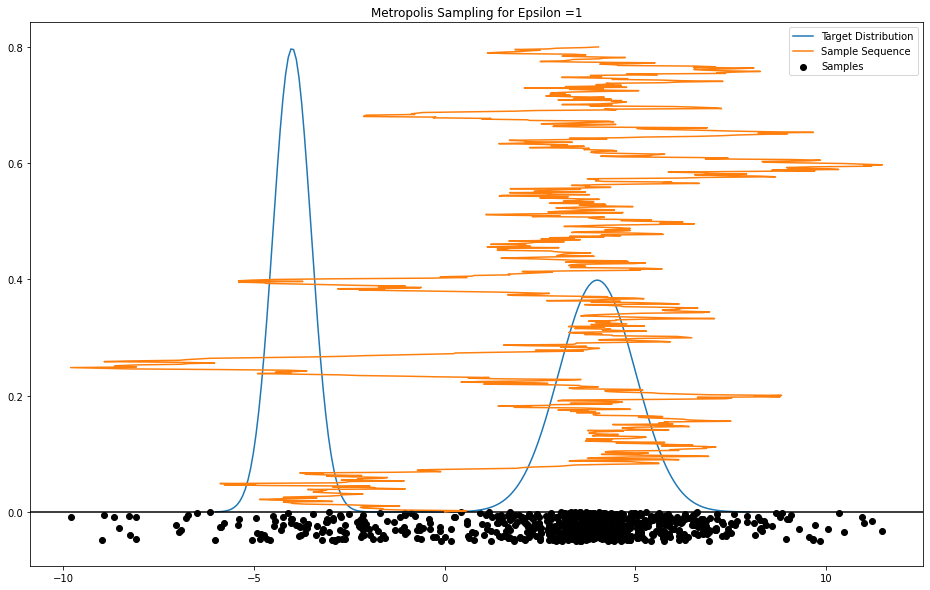

In [65]:
x = np.linspace(-6, 8, num=200)
p_x = target_pdf(x)
ep = 1

samples = produce_chain(ep, size=1000)
y = np.linspace(0, 0.8, num=len(samples))

plt.figure(figsize=(16, 10))
plt.plot(x, p_x, label="Target Distribution")
plt.scatter(samples, sts.uniform.rvs(-0.05, 0.05, size=len(samples)), color='black', label="Samples")
plt.axhline(0, color="black")
plt.plot(samples, y, label="Sample Sequence")
plt.title("Metropolis Sampling for Epsilon ="+str(ep))
plt.legend()
plt.plot()

[]

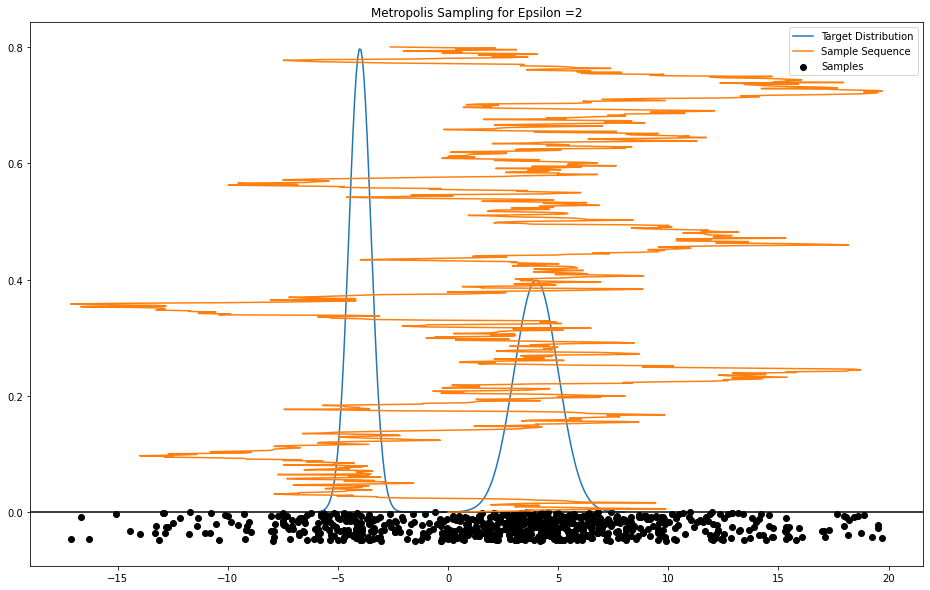

In [66]:
x = np.linspace(-6, 8, num=200)
p_x = target_pdf(x)
ep = 2

samples = produce_chain(ep, size=1000)
y = np.linspace(0, 0.8, num=len(samples))

plt.figure(figsize=(16, 10))
plt.plot(x, p_x, label="Target Distribution")
plt.scatter(samples, sts.uniform.rvs(-0.05, 0.05, size=len(samples)), color='black', label="Samples")
plt.axhline(0, color="black")
plt.plot(samples, y, label="Sample Sequence")
plt.title("Metropolis Sampling for Epsilon ="+str(ep))
plt.legend()
plt.plot()

[]

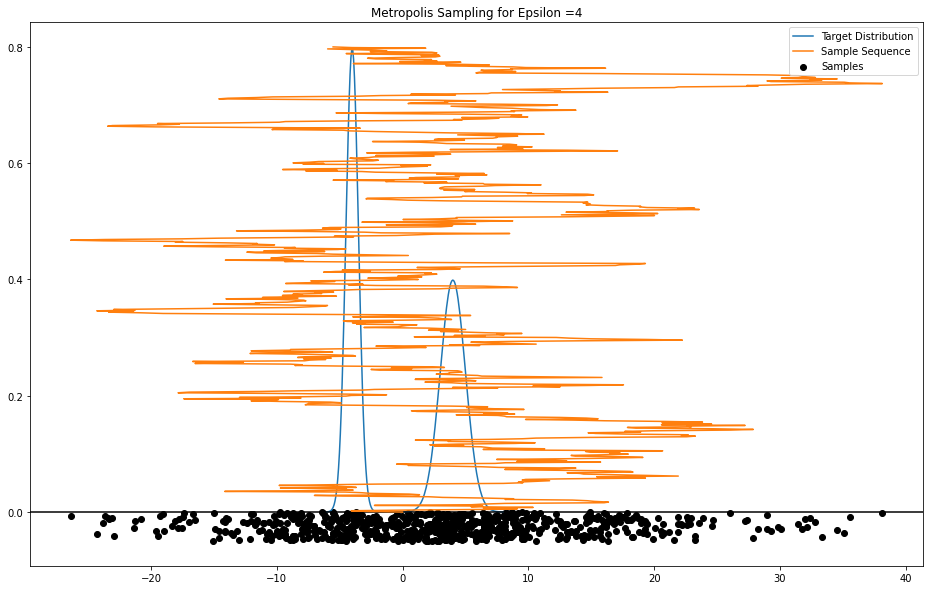

In [69]:
x = np.linspace(-6, 8, num=200)
p_x = target_pdf(x)
ep = 4

samples = produce_chain(ep, size=1000)
y = np.linspace(0, 0.8, num=len(samples))

plt.figure(figsize=(16, 10))
plt.plot(x, p_x, label="Target Distribution")
plt.scatter(samples, sts.uniform.rvs(-0.05, 0.05, size=len(samples)), color='black', label="Samples")
plt.axhline(0, color="black")
plt.plot(samples, y, label="Sample Sequence")
plt.title("Metropolis Sampling for Epsilon ="+str(ep))
plt.legend()
plt.plot()

In [68]:
from scipy import signal
import matplotlib.pyplot as plt
def plot_acr(x):
  plt.acorr(x, maxlags=20, detrend=lambda x: signal.detrend(x, type='constant'))

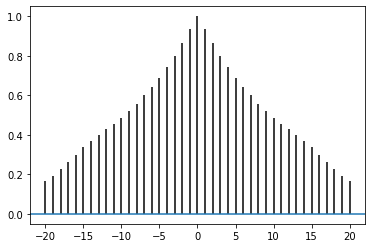

In [70]:
plot_acr(samples)